# Research Space

In [1]:
import pandas as pd
from ipywidgets import interact

import sys
sys.path.append("../")
from MapSci.papers import papers
from MapSci.research_space import research_space

TEXT

In [2]:
pp = papers("lattes")
maps = research_space("lattes", pp)

TEXT

In [3]:
maps.compute(2000, 2014)

guevara(2000, 2014, 0.1)
chinazzi(2000, 2014, 0.1, 200)


TEXT

In [4]:
areas = pd.read_pickle("../dataset/SJR/areas.pkl")
areas.head()

,Code,Field,Subject area,Classification
0,1000.0,multidisciplinary,health sciences,multidisciplinary
1,1100.0,general agricultural and biological sciences,life sciences,agricultural and biological sciences
2,1101.0,agricultural and biological sciences (miscella...,life sciences,agricultural and biological sciences
3,1102.0,agronomy and crop science,life sciences,agricultural and biological sciences
4,1103.0,animal science and zoology,life sciences,agricultural and biological sciences


TEXT

In [23]:
fields = maps.phi["guevara(2000, 2014, 0.1)"][1].keys()
dict_area = areas[["Field", "Subject area"]].set_index("Field").to_dict()["Subject area"]
unique = areas["Subject area"].unique()
subs = {u: v for v,u in enumerate(sorted(unique))}
values = [subs[dict_area[node]] for node in fields]

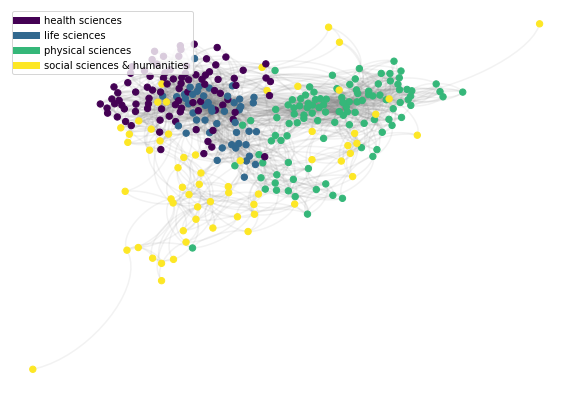

In [6]:
pos = maps.plot("guevara(2000, 2014, 0.1)", values, labels=subs, new=True)

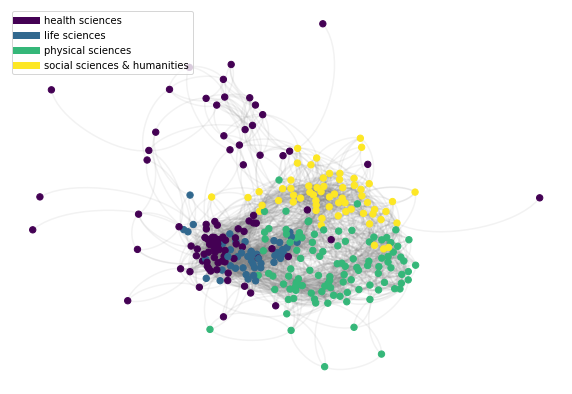

In [24]:
pos = maps.plot("chinazzi(2000, 2014, 0.1, 200)", values, labels=subs, new=True, threshold=0.3)

TEXT

In [25]:
def f(th):
    maps.plot("chinazzi(2000, 2014, 0.1, 200)", values, labels=subs, threshold=th)

interact(f, th=(0.05,0.95,0.05))

interactive(children=(FloatSlider(value=0.45, description='th', max=0.95, min=0.05, step=0.05), Output()), _do…

<function __main__.f(th)>

Intermediate classification

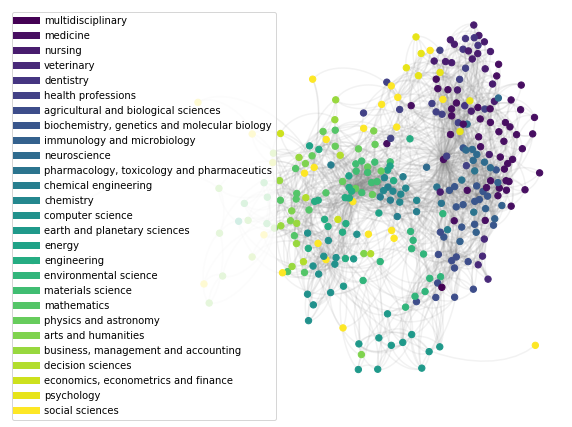

In [21]:
dict_area = areas[["Field", "Classification"]].set_index("Field").to_dict()["Classification"]
dict_catg = areas[["Classification", "Subject area"]].set_index("Classification").to_dict()["Subject area"]
unique = areas["Classification"].unique()
subs = {u: v for v,u in enumerate(sorted(unique, key=lambda x: dict_catg[x]))}
values = [subs[dict_area[node]] for node in fields]

pos = maps.plot("guevara(2000, 2014, 0.1)", values, labels=subs, new=True)